In [3]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn import decomposition
import scanpy as sc

# Data importing using Pandas

Data: gene expression cancer RNA-Seq Dataset 

Taken from: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

Source: Samuele Fiorini, samuele.fiorini '@' dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

In [4]:
data = pd.read_csv('data.csv', index_col = 0)
labels = pd.read_csv('labels.csv', index_col = 0)

The dataset is composed of 801 instances and 20531 attributes. Additionally there is a data file for cancer type for each sample

In [5]:
data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


There were two files: one with data and one with labels for cancer types for each sample. Let's add the Class labels to the dataset

In [9]:
data_num = data.copy()

In [10]:
data['Cancer Type'] = labels

In [11]:
data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Cancer Type
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA
sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0,PRAD
sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0,KIRC
sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0,PRAD
sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0,BRCA
sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0,PRAD


In [7]:
desc_data = data.describe()

In [8]:
desc_data.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [9]:
desc_data.iloc[2]

gene_0        0.136850
gene_1        1.200828
gene_2        1.065601
gene_3        0.638819
gene_4        0.506537
                ...   
gene_20526    0.670371
gene_20527    0.580569
gene_20528    0.563849
gene_20529    2.073859
gene_20530    0.364529
Name: std, Length: 20531, dtype: float64

In [12]:
types = data['Cancer Type'].unique()

## Do a Principal Component Analysis on the raw data

First, let's sort the data based on Cancer Type labels and create a copy data set with no labels (only numerical data)

In [13]:
#Sort data based on cancer type labels
data_sort = data.sort_values('Cancer Type').copy()

#Create a copy dataframe with no label column (only numerical data)
data_num_sort = data_sort.copy()
data_num_sort.drop(columns = 'Cancer Type', inplace = True)

Perform Principal Component Analysis to project the data into 2D space

In [14]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_num_sort)
X = pca.transform(data_num_sort)


In [15]:
# add data points projected onto two PC to the dataframe housing the labels
data_sort['PCA1'] = X.T[0]
data_sort['PCA2'] = X.T[1]

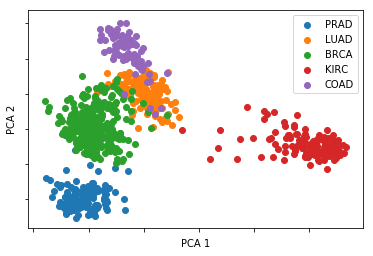

In [16]:
#Plot the PC transformed data scatter plot colored based on original "Cancer Type" label
fig, ax = plt.subplots(1, 1)
for iG,i in enumerate(types):
    ax.scatter(data_sort[data_sort['Cancer Type'] == f'{i}']['PCA1'], data_sort[data_sort['Cancer Type'] == f'{i}']['PCA2'], label = f'{i}')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.legend()





array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [ ]:
type_data = {}
for i in data['Cancer Type'].unique():
    dat = (data[data['Cancer Type'] == f'{i}'])
    dat.drop(columns = 'Cancer Type', inplace = True)
    type_data["{0}".format(i)] = sc.AnnData(dat)

In [ ]:
adata = sc.AnnData.concatenate(*[type_data[s] for s in types], 
                               batch_categories=types,
                               batch_key='type')

print(adata)

In [ ]:
sc.tl.pca(adata, n_comps=50)

In [ ]:
sc.pl.pca(adata, color='type')

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['type'])